In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import warnings

def fxn():
    warnings.warn('deprecated', DeprecationWarnings)
    
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# **HOUSES PRICES - Techniques of Regression Prediction**

This competition is very important for me. I'm a Data Science and Machine Learning enthusiast, I have been to study these all themes for one year. Thus, these competitions of Kaggle are good opportunities for practice all techniques that I was a study of theoric form. And as are evident, I was take as reference many noteboooks, when the authors to dominate the area, offer all knowedge of years and a useful guide for my studies. 

Somes of this authors is:
1. [Stacked Regressions : Top 4% on LeaderBoard](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) by Serigne. He has excellent work in Stacked Regression, add to a great work in Data Cleaning and Data Preprocessing that is very useful for this notebook.
2. [Regression & Classification with Ames Housing Data](https://www.perkinsml.me/ames-housing) by Matthew Perkins. His EDA is beautiful and it served for a preliminary analysis. Check this portfolio. ;)

All phases it is contained in this notebook is of the biggest common:
1. Data Processing and Analysis.
* Outliers - identify the values in SalesPrice that can be noisy and will affect of train techniques of regression evaluated.
* Normalize of Target Variable - normalize SalesPrice with log function and we can get a better probability.
* Features Engineering - data cleaning, imputing, engineering variables, Econdig, BOX - COX transformation  and Dummy Variables

2. Modeling
* Random Forest Regression - prediction SalesPrice with classical forest regression with Scikit-Learn
* Gradient Boosting Regression - with gradient boosting tree techniques, cross-validation and grid search to find the best model with optimal hyperparameters.
* Linear Regression Techniques - With some techniques linear regression with penalty as LASSO and Bayesian Ridge.

3. Selection of the Best Model.
* Submission of ressults
    


In [3]:
# Charge of libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from scipy import stats
from scipy.stats import norm, skew
from math import ceil

We configure general setup for plot

In [4]:
# Set Style pallete for Plot
color = sns.color_palette()
sns.set_style('darkgrid')

# Path directory when is all files of the study
os.chdir("/kaggle/input/house-prices-advanced-regression-techniques")

# Charge data in DataFrame
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# Save ID columns
id_train = train['Id']
id_test = test['Id']
id_submission = submission['Id']

# Drop ID columns
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)
submission.drop('Id', axis = 1, inplace = True)

# The size of DataSet (Train and Test)
print("The size of train dataset is {} and the test is {}"
      .format(train.shape, test.shape))

The size of train dataset is (1460, 80) and the test is (1459, 79)


In [5]:
# Preview of dataset.
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **1. DATA PROCESSING AND ANALYSIS**

## 1.1 OUTLIERS

Let's explore these ouliers in principal variables float's

Text(0.5, 1.0, 'GRLivArea vs SalesPrice')

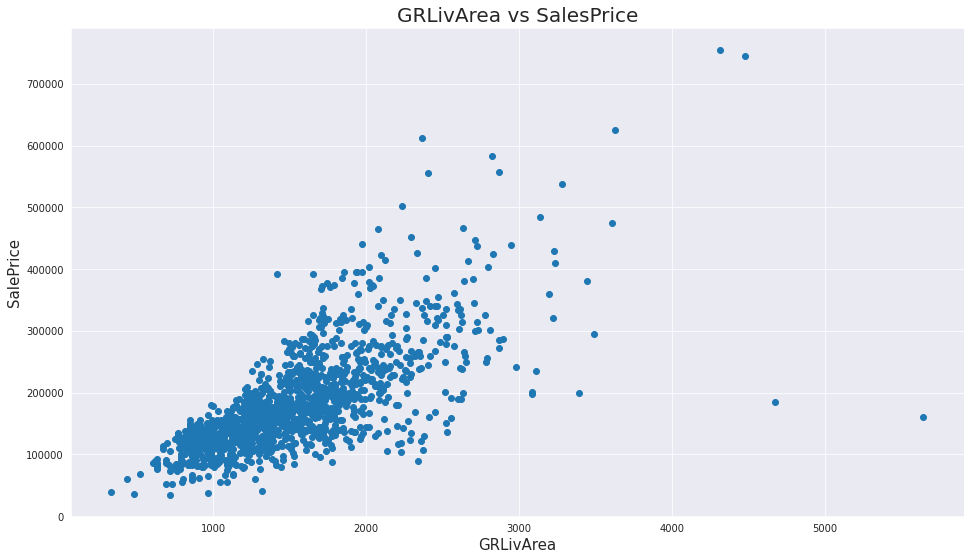

In [6]:
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('GRLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.title("GRLivArea vs SalesPrice", fontsize = 20)

We can see at the bottom right two elements with extremely large of GrLivArea that are of a low price. These values are outliers clearly.  Therefore, we can proceed to delete them.

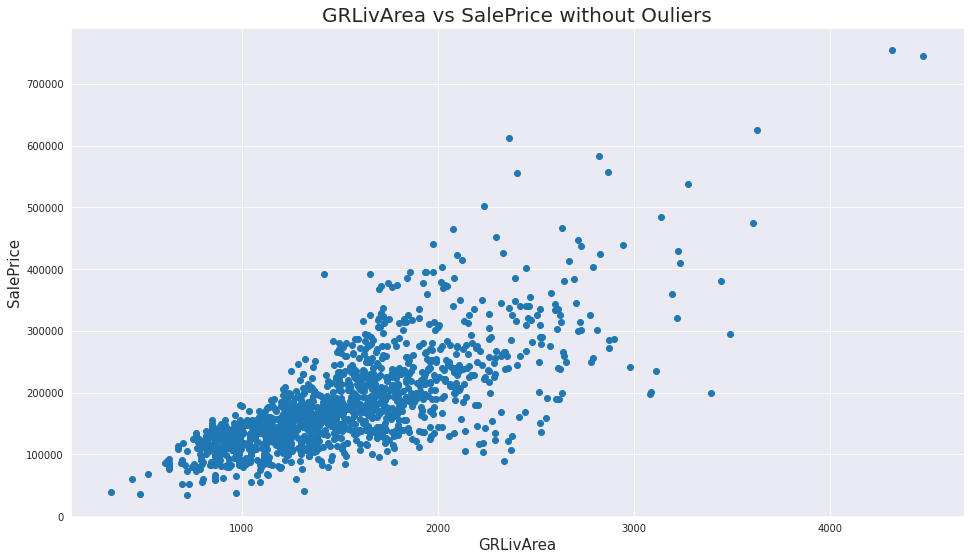

In [7]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index,
                   axis=0)

# Check the graphic again
fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('GRLivArea', fontsize=15)
plt.ylabel('SalePrice', fontsize=15)
plt.title("GRLivArea vs SalePrice without Ouliers", fontsize = 20)
plt.show()

## 1.2 NORMALIZE OF TARGET VARIABLE

We can need to do some analysis on this SalePrice variable. These is variable predict

The Parameters mu = 180932.92 and sigma = 79467.79


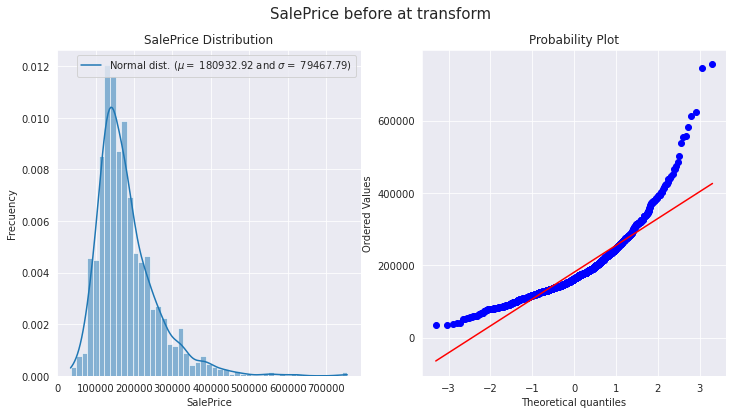

In [8]:
# Target Variable Analysis
fig, ax = plt.subplots(figsize=(12,6), nrows = 1, ncols=2)
sns.histplot(train['SalePrice'], hue_norm = norm,
             stat = 'frequency', kde = True, ax = ax[0])
ax[0].set_title("SalePrice Distribution")

# Get the fitted parameters used by the fuction
(mu, sigma) = norm.fit(train['SalePrice'])
print("The Parameters mu = {:.2f} and sigma = {:.2f}".format(mu, sigma))

ax[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc = 'best')

ax[0].set_ylabel("Frecuency")

# Get also a the Probality Plot
#fig = plt.figure()
ax[1] = stats.probplot(train['SalePrice'], plot = plt)
fig.suptitle("SalePrice before at transform", fontsize = 15)
plt.show()

With the purpose of obtaining to the linear model, we need to transform this variable at a normal distribution.

In [9]:
# Normalize of Target Variable with Log (1+x).
train['SalePrice'] = np.log1p(train['SalePrice'])

The Parameters mu = 12.02 and sigma = 0.40


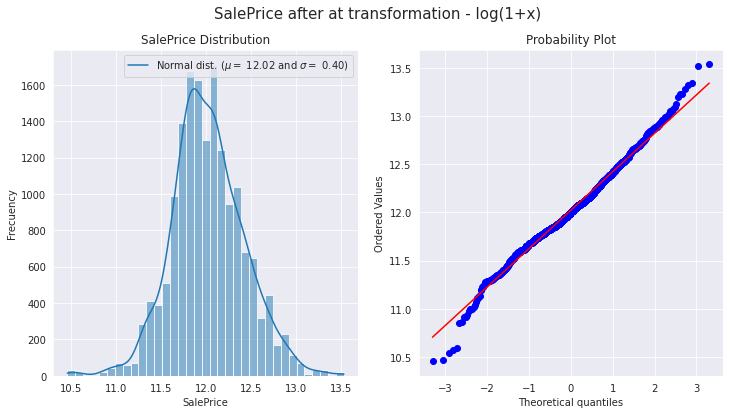

In [10]:
# Target Variale after of transformation.
fig, ax = plt.subplots(figsize=(12,6), nrows = 1, ncols = 2)
sns.histplot(train['SalePrice'], hue_norm = norm,
             stat = 'frequency', kde = True, ax = ax[0])
ax[0].set_title('SalePrice Distribution')

# Get the fitted parameters used by the fuction
(mu, sigma) = norm.fit(train['SalePrice'])
print("The Parameters mu = {:.2f} and sigma = {:.2f}".format(mu, sigma))

ax[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc = 'best')

ax[0].set_ylabel("Frecuency")

# Get also a the Probality Plot
ax[1] = stats.probplot(train['SalePrice'], plot = plt)
fig.suptitle("SalePrice after at transformation - log(1+x)", fontsize = 15)
plt.show()

Now the data appears more normally distributed. Also, we did to corrected the skew

## 1.3 FEATURES ENGINEERING

In [11]:
# Concatenate the train and test data in the same DataFrame

# We save the size data
n_train = train.shape[0]
n_test = test.shape[0]
n_data = n_train + n_test

# Save target Variable of Train Data
y_target = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
print("The data sets has size of: {}".format(all_data.shape))


The data sets has size of: (2917, 79)


### 1.3.1 MISSING VALUES

We does manage of data that contain missing values,somes will can drop and others does replace with a calculate. This depend of type data, its importance and amount missing values.

We define a fuction to calculate the missing values.

In [12]:
# mis_values def.
def miss_values(df):
    
    columns = df.columns.values.tolist()
    cols = []
    
    for c in columns:
        miss = pd.isnull(df[c]).sum()
        if miss >0:
            cols.append([c, round(miss/len(df)*100, 2), miss, df[c].dtypes])
    
    isnull = pd.DataFrame(cols).rename({0: 'Feature',
                                        1: '% Null',
                                        2: 'Nº',
                                        3: 'dtype'},
                                       axis = 1)
    
    isnull = isnull.set_index(['Feature'])\
        .sort_values(['% Null'], ascending = False)
        
    return isnull

isnull_before = miss_values(all_data)
print("The feutures had missing values or NA is: ")
isnull_before.head(len(isnull_before))

The feutures had missing values or NA is: 


,% Null,Nº,dtype
Feature,,,
PoolQC,99.69,2908,object
MiscFeature,96.40,2812,object
Alley,93.21,2719,object
Fence,80.43,2346,object
FireplaceQu,48.68,1420,object
LotFrontage,16.66,486,float64
GarageFinish,5.45,159,object
GarageQual,5.45,159,object
GarageCond,5.45,159,object


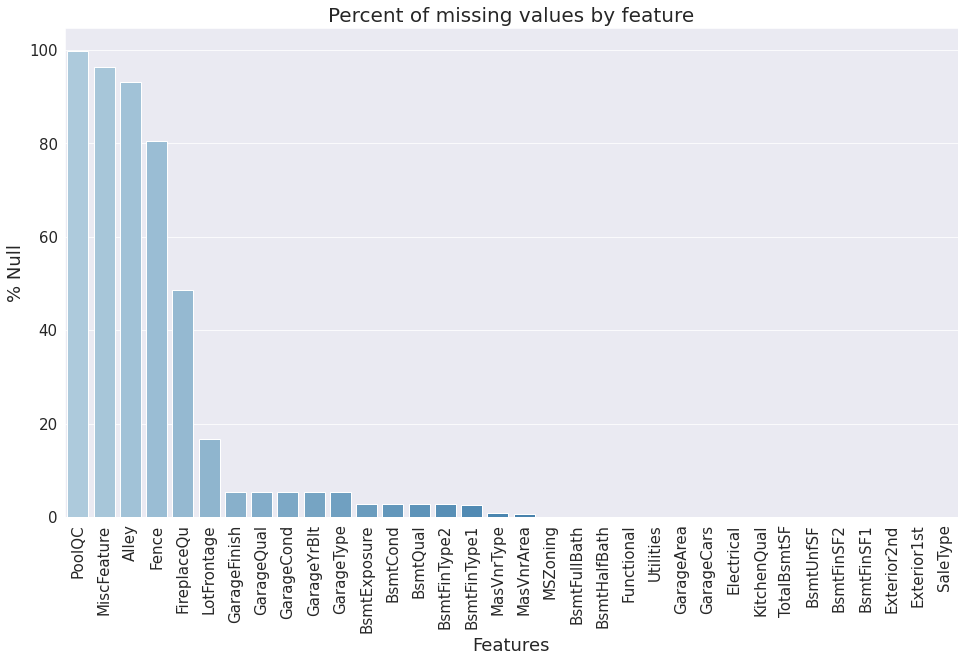

In [13]:
# We do graphic a the bar plot those features that have missing values
fig, ax = plt.subplots(figsize=(16,9))
plt.xticks(rotation='90', fontsize = 15)
plt.yticks(fontsize = 15)
sns.barplot(x = isnull_before.index, y = '% Null', palette = 'Blues_d', 
            data = isnull_before)
plt.xlabel('Features', fontsize = 18)
plt.ylabel('% Null', fontsize = 18)
plt.title("Percent of missing values by feature", fontsize = 20)
plt.show()

We calculate correlation (with Pearson method) level with special attention at the features that have biggest correlations with Sales Price (Target Variable)

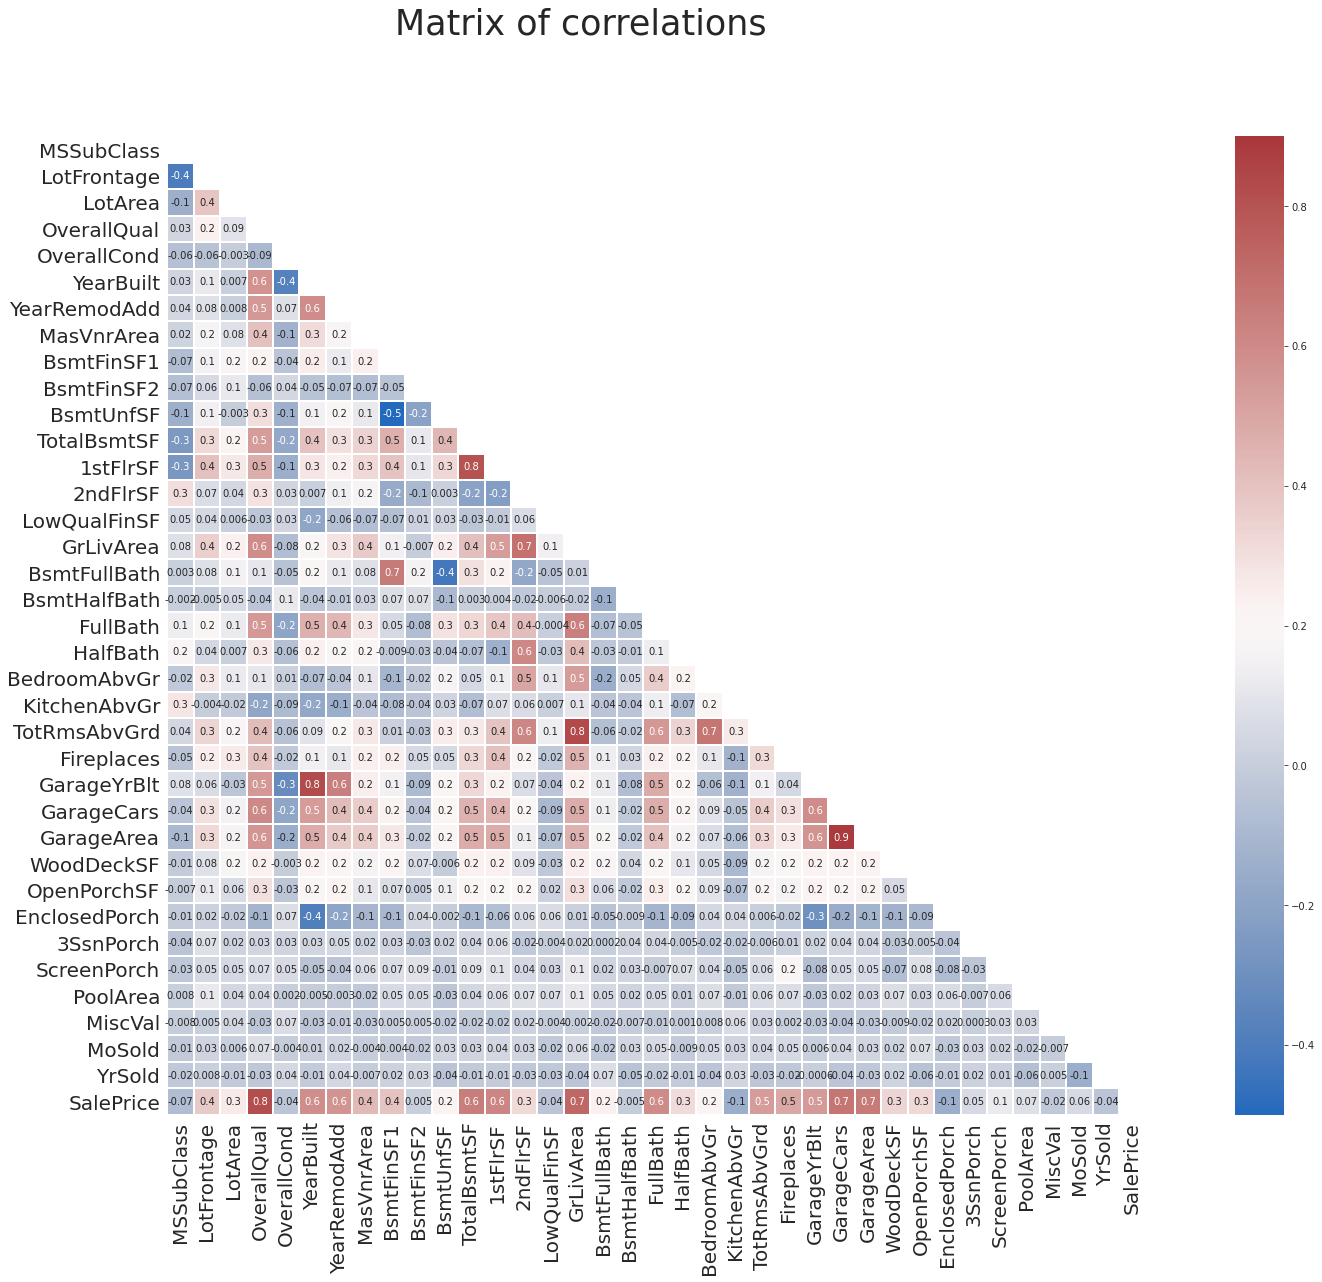

In [14]:
# could have importance that we see the correlations level eache feature
corr_all = train.corr(method = 'pearson')

# We Plot a Heatmap to see this level correlation intuitively

mask = np.zeros_like(corr_all)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize = (32, 18))
    fig.suptitle('Matrix of correlations', fontsize = 35)
    ax = sns.heatmap(corr_all, linewidths=0.1, vmin = -0.5, annot = True,
                     annot_kws= {'size' :10}, fmt = '.1g' ,vmax = 0.9, square = True, 
                     mask = mask, cmap = "vlag")
    ax.tick_params(axis = 'both', labelsize = 20)

### 1.3.2 IMPUTING MISSING VALUES

Some features have missing values are discreet and others numerics. 
We build two iteration loops for fill missing values or NA with respective values 'None' or '0'

The others features require personalizing treatment, for example, LotFrontage and KitchenQual.

**DISCRETE VARIABLES**

* PoolQC: PoolQC has NA values when these discribe "No Poll". This explain as had 99% of missing values
* MiscFeature: the data description that mark NA as None Miscellaneous Features
* Alley: the data description that mark NA as None Alley access street
* Fence: the data description points out that the NA value as No Fence
* FireplaceQu: the data description points out that the NA value as No Fireplace when Fireplace is zero
* Garage: the features described from of 'Garage' features, points out that the NA values is No Garage
* Basement: the features described from of 'basement' features, point out that the NA values is No Basement
* MasVnrType: for options in this feature is None (without type masonary veneer). Therefore, we fill missing values with 'None'.

In [15]:
# Imputiing "None" value.
cols_fill = ['PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
             'GarageType', 'GarageCond', 'GarageQual', 'GarageFinish',
             'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2',
             'MasVnrType']

for c in cols_fill:
    all_data[c].fillna('None', inplace = True)

* LotFrontage: as it is a Linear Feet Squared of Street that connects to the property, we can build a median where it will depend on the neighborhood. With this metric, we inputing missing values in this feature.

In [16]:
# LotFrontage
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

* MSZoning: this feature describes the Classification Zoning of house, for example, 'Agriculture, Comercial, Residential, industrial, between others. We located the higher frequency of this classification into the Neighborhood and fill these missing values with this.

In [17]:
MSzone_gb = all_data.groupby('Neighborhood')['MSZoning'].value_counts()
print(MSzone_gb)

Neighborhood  MSZoning
Blmngtn       RL           25
              RM            3
Blueste       RM           10
BrDale        RM           30
BrkSide       RM           65
              RL           43
ClearCr       RL           44
CollgCr       RL          253
              RM           14
Crawfor       RL           91
              RM           10
              RH            2
Edwards       RL          178
              RM           12
              RH            2
Gilbert       RL          165
IDOTRR        RM           68
              C (all)      22
MeadowV       RM           37
Mitchel       RL          104
              RM            9
NAmes         RL          436
              RH            7
NPkVill       RL           23
NWAmes        RL          131
NoRidge       RL           71
NridgHt       RL          165
              RM            1
OldTown       RM          198
              RL           39
              C (all)       2
SWISU         RL           38
              RH 

In [18]:
for i in range(0, len(all_data)):    
    if pd.isnull(all_data['MSZoning'].iloc[i]) == True: 
       nbh = MSzone_gb[all_data['Neighborhood'].iloc[i]].index[0][1]
       all_data['MSZoning'].iloc[i] = nbh    

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


* Functional: This feature describe the home functional. The higher frecuency found is 'Typ' (Typical functionality). We fill NaN values with this data.

In [19]:
# Functional
print(all_data['Functional'].value_counts())
all_data['Functional'].fillna('Typ', inplace = True)

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64


* Utilities: This feature describes the general home utilities. The higher frequency found is 'AllPub' (All Public Utilities) and are these the only values except one that is NoSewr. We believe it convenient to drop these columns because they same not offer value at the model

In [20]:
# Utilities
print(all_data['Utilities'].value_counts())

idx = all_data[all_data['Utilities'] == 'NoSeWa'].index.values
print(idx) # -->  the only value is not (all public utilities is train data set)
all_data.drop('Utilities', axis = 1, inplace = True) 

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64
[943]


* Electrical: This feature describe the electrical conditions. The higher frecuency found is SBrkr' (Standard Circuit Breakers & Romex). We fill NaN values with this data.

In [21]:
# Electrical
print(all_data['Electrical'].value_counts())
all_data['Electrical'].fillna('SBrkr', inplace = True)

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64


* KitchenQual: This feature describe the kitchen quality. The higher frecuency found is between 'TA' (Typical/Average) and 'Gd' (Good). We fill NaN values with this data.

In [22]:
# KitchenQual
KitchenQ_gb = all_data.groupby('Neighborhood')['KitchenQual'].value_counts()
print(KitchenQ_gb)

idx = pd.isnull(all_data['KitchenQual'])
idx = idx[idx == True].index.values
fill_value = KitchenQ_gb[all_data['Neighborhood'].iloc[idx]].index[0][1]

all_data['KitchenQual'].iloc[idx] = fill_value

Neighborhood  KitchenQual
Blmngtn       Gd             27
              Ex              1
Blueste       TA              7
              Gd              3
BrDale        TA             27
                             ..
Timber        TA             15
              Ex             11
Veenker       Gd             14
              TA              6
              Ex              4
Name: KitchenQual, Length: 76, dtype: int64


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


* Exterior1st: This feature describe the first material exterior as was bluid. The higher frecuency found is 'VinylSd' (Vinyl Siding). We fill NaN values with this data.

In [23]:
# Exterior1xt
print(all_data['Exterior1st'].value_counts())
all_data['Exterior1st'].fillna('VinylSd', inplace = True)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
Stone         2
CBlock        2
AsphShn       2
ImStucc       1
Name: Exterior1st, dtype: int64


* Exterior2nd: This feature describe the second material exterior as was bluid. The higher frecuency found is'VinylSd' (Vinyl Siding). We fill NaN values with this data.

In [24]:
# Exterior2nd
print(all_data['Exterior2nd'].value_counts())
all_data['Exterior2nd'].fillna('VinylSd', inplace = True)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


* SaleType: This feature describe Sale Type. Intuitively we can see one correlation between Sale Condition and Sale Type. With this table grouped of these two variables, is can describe its influence clearly.

In [25]:
# SaleCondition
SaleType_gb = all_data.groupby('SaleCondition')['SaleType'].value_counts()
idx = pd.isnull(all_data['SaleType'])
idx = idx[idx == True].index.values

fill_value = SaleType_gb[all_data['SaleCondition'].iloc[idx]].index[0][1]
all_data['SaleType'].fillna(fill_value, inplace = True)

**CONTINUUM VARIABLES**

* GarageYrBlt: This feature describe is year garage was build. The NaN values coincide with'None' values in Garage Type (No Garage). Thus, we inputing zero value.
* GarageArea, GarageCars: This feature is same conditions and after variable describe.
* MasVnrArea: This feature describe the square feet of masonry veneer. the NaN values coincide with 'None' values in Masonry Veneer Type. Thus, we fill missing values with zero. 
* BsmtUnfSF, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF: Is features what is desccribe of square feet these variables are part of basement conditions both completed, unfinished as No Basement

In [26]:
cols_fill = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea',
             'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
             'BsmtFullBath', 'BsmtHalfBath']

for col in cols_fill:    
    all_data[col].fillna(0, inplace = True)

""" We can see the status of missing values after treatment variables. """
isnull_after = np.sum((all_data.isnull().sum()/len(all_data))) *100
print("The Percentage of missing values is: {:.2f}%".format(isnull_after))

The Percentage of missing values is: 0.00%


### 1.3.3 EGINEERING VARIABLES

Some feauture require to addition tratment. Variebles as OverallCond is cateogrical character but, it is type as float64. We converse these variables in type string. 

In [27]:
# Feature at convert:
    # transformation in string
cols = ['OverallCond', 'OverallQual', 'YrSold', 'MoSold', 'MSZoning']
all_data[cols] = all_data[cols].astype(str, copy = True)
    
    # transformation in intenger
cols = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageYrBlt', 'YearBuilt']
all_data[cols] = all_data[cols].astype(int, copy = True)

    # transformation in float64
cols = ['1stFlrSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'LotArea', ]
all_data[cols] = all_data[cols].astype(float, copy = True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   float64
 4   Street         2917 non-null   object 
 5   Alley          2917 non-null   object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   LotConfig      2917 non-null   object 
 9   LandSlope      2917 non-null   object 
 10  Neighborhood   2917 non-null   object 
 11  Condition1     2917 non-null   object 
 12  Condition2     2917 non-null   object 
 13  BldgType       2917 non-null   object 
 14  HouseStyle     2917 non-null   object 
 15  OverallQual    2917 non-null   object 
 16  OverallCond    2917 non-null   object 
 17  YearBuilt      2917 non-null   int64  
 18  YearRemo

### 1.3.5 ENCODING VARIABLES

We have some tools for the encoding of categorical variables. In this DataSet, we have many categorical features with multiplex options whose ordering has much information thus, dummy variables aren't options. One elegant solution could be to encoding variables in progression numeric from 0 to n-options. Scikit-Learn have tools for doing to encode:
    
For Algorithms of Machine Learning, manage numeric data type is most efficient.

In [28]:
# Selection features for encoding
cols_encoder = ['MSSubClass', 'LotShape', 'Alley', 'OverallQual', 'OverallCond',
        'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
        'Fence', 'MoSold']

# Import library of sklearn for the econding varibles:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

for col in cols_encoder:
    all_data[col] = lbe.fit_transform(list(all_data[col].values))
    
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2917 non-null   object 
 2   LotFrontage    2917 non-null   float64
 3   LotArea        2917 non-null   float64
 4   Street         2917 non-null   object 
 5   Alley          2917 non-null   int64  
 6   LotShape       2917 non-null   int64  
 7   LandContour    2917 non-null   object 
 8   LotConfig      2917 non-null   object 
 9   LandSlope      2917 non-null   object 
 10  Neighborhood   2917 non-null   object 
 11  Condition1     2917 non-null   object 
 12  Condition2     2917 non-null   object 
 13  BldgType       2917 non-null   object 
 14  HouseStyle     2917 non-null   object 
 15  OverallQual    2917 non-null   int64  
 16  OverallCond    2917 non-null   int64  
 17  YearBuilt      2917 non-null   int64  
 18  YearRemo

### 1.3.6 TRANSFORMATION

The must feature have a bias higher at the absolute value of **|1|**. A good practice could be to transform each variable with a suitable function.

The **Box-Cox** transformation is a good option for multiple available transformations to have. We iterate a **Lambda** value until to getting a transformation that comes closer to an normal distribution.

Features selection: 
 Index(['PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch', 'BsmtFinSF2',
       'EnclosedPorch', 'ScreenPorch', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', '1stFlrSF', 'LotFrontage', 'GrLivArea'],
      dtype='object')


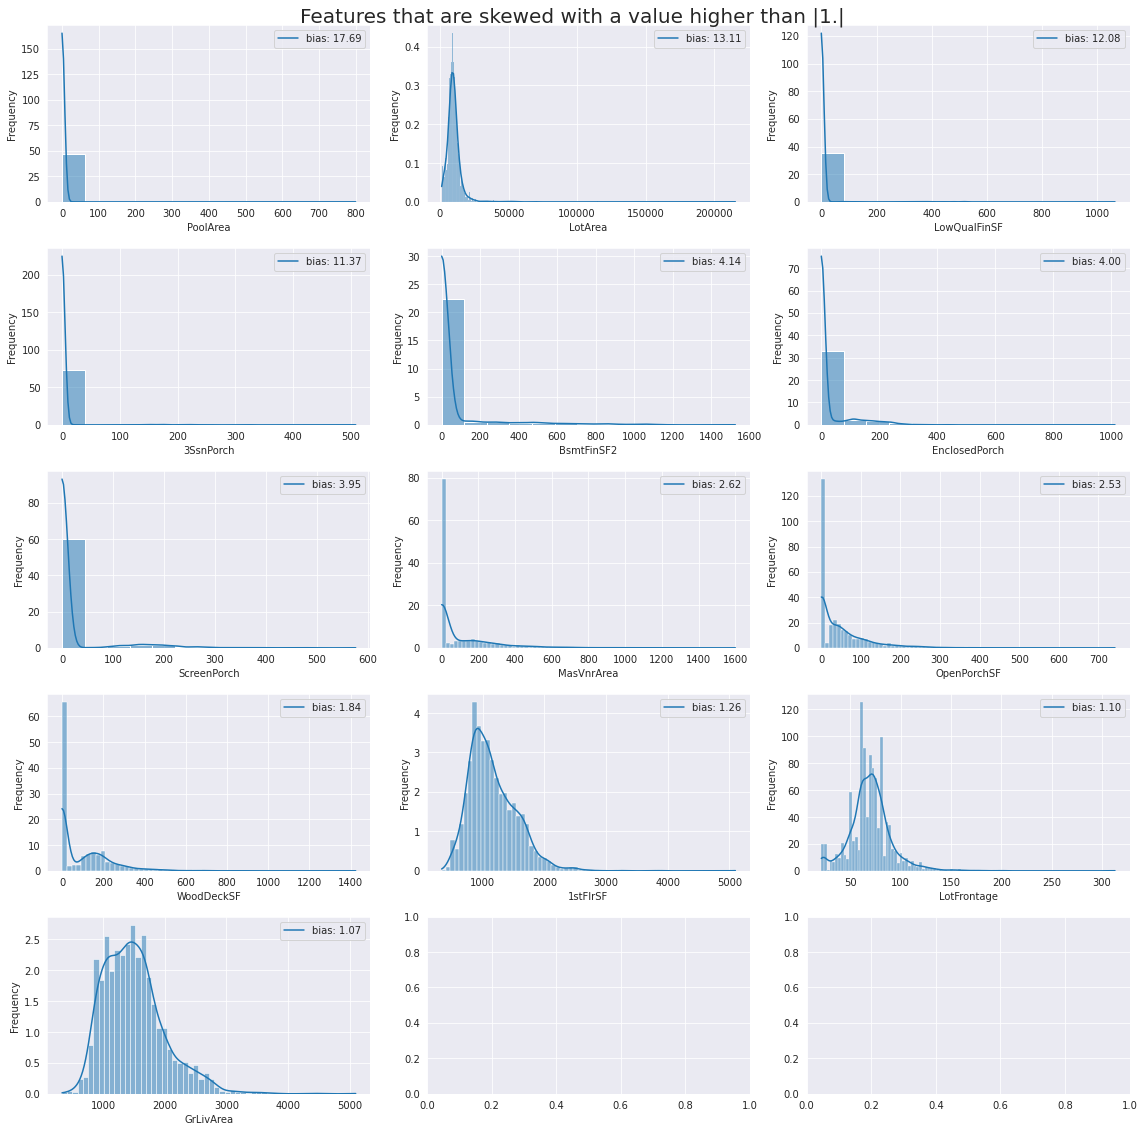

In [29]:
features = all_data.dtypes[all_data.dtypes == 'float'].index

# we extract the bias value and order.
skewed_feats = all_data[features].apply(lambda x: skew(x))\
    .sort_values(ascending = False)

# We select those variables that have bias higher than 1
feats_bias = skewed_feats[abs(skewed_feats) >= 1].index
print('Features selection: \n', feats_bias)

# can be convenient that we see the distribution of these features.
n_cols = 3
n_rows = ceil(len(feats_bias)/n_cols)

fig, ax = plt.subplots(ncols = n_cols , nrows = n_rows, figsize=(16,16))
for i, col in enumerate(all_data[feats_bias]):
    
    axes = ax[i//n_cols, i%n_cols]
    sns.histplot(all_data[col], stat = 'frequency',
                 hue_norm = norm, kde = True, ax = axes)
    axes.legend(['bias: {:.2f}'.format(skew(all_data[col]))], 
               loc = 'best')
    fig.suptitle(t = 'Features that are skewed with a value higher than |1.|', 
                 fontsize = 20)
    plt.tight_layout()


#### TRAISNFORMATION BOX COX 1 + X)

We build two simple functions that search at optimal lambda that to reduce
of the standard deviation values close to zero.

In [30]:
def skew_asymmetry(X, th_skew = (-1, 1), th_cv = 0.8):
    
    # th_skew = Threshold considered for we catalog variables as asymmetrical.
    # library import 
    from scipy.stats import skew
    asymmetry = skew(X)
    if (th_skew[0] > asymmetry > th_skew[1]): #or cv > th_cv:
        return True
    else:
        return False

def search_lambda_boxcox1p(df):
    
    #library import
    import numpy as np
    import pandas as pd
    from scipy.stats import boxcox
    # Range lambada for iterate    

    list_feat = []
    
    for feat in df.columns.tolist():              
        if skew_asymmetry(df[feat]) == False:            
            _, lm = boxcox(df[feat] + 1) #
            list_feat.append([feat, lm])           
        
        array_feat = np.array(list_feat)
        df_lm = pd.DataFrame(data = array_feat, columns = ['feature', 'opt-lambda'])
        df_lm.set_index('feature', inplace=True)
            
    return df_lm 

In [31]:
from scipy.special import boxcox1p

# Selection of lambda parameter

all_data_t = all_data.copy()
df_lambda = search_lambda_boxcox1p(all_data_t[feats_bias])

# Transform each variable with box-cox (1+x) with boxcox1p from scipy
for col in feats_bias:
    #↓all_data_t[col] = boxcox1p(all_data_t[col].to_numpy(), 0.25)
    all_data_t[col] = boxcox1p(all_data_t[col].to_numpy(), float(df_lambda.loc[col][0]))

Plot the new distribution:

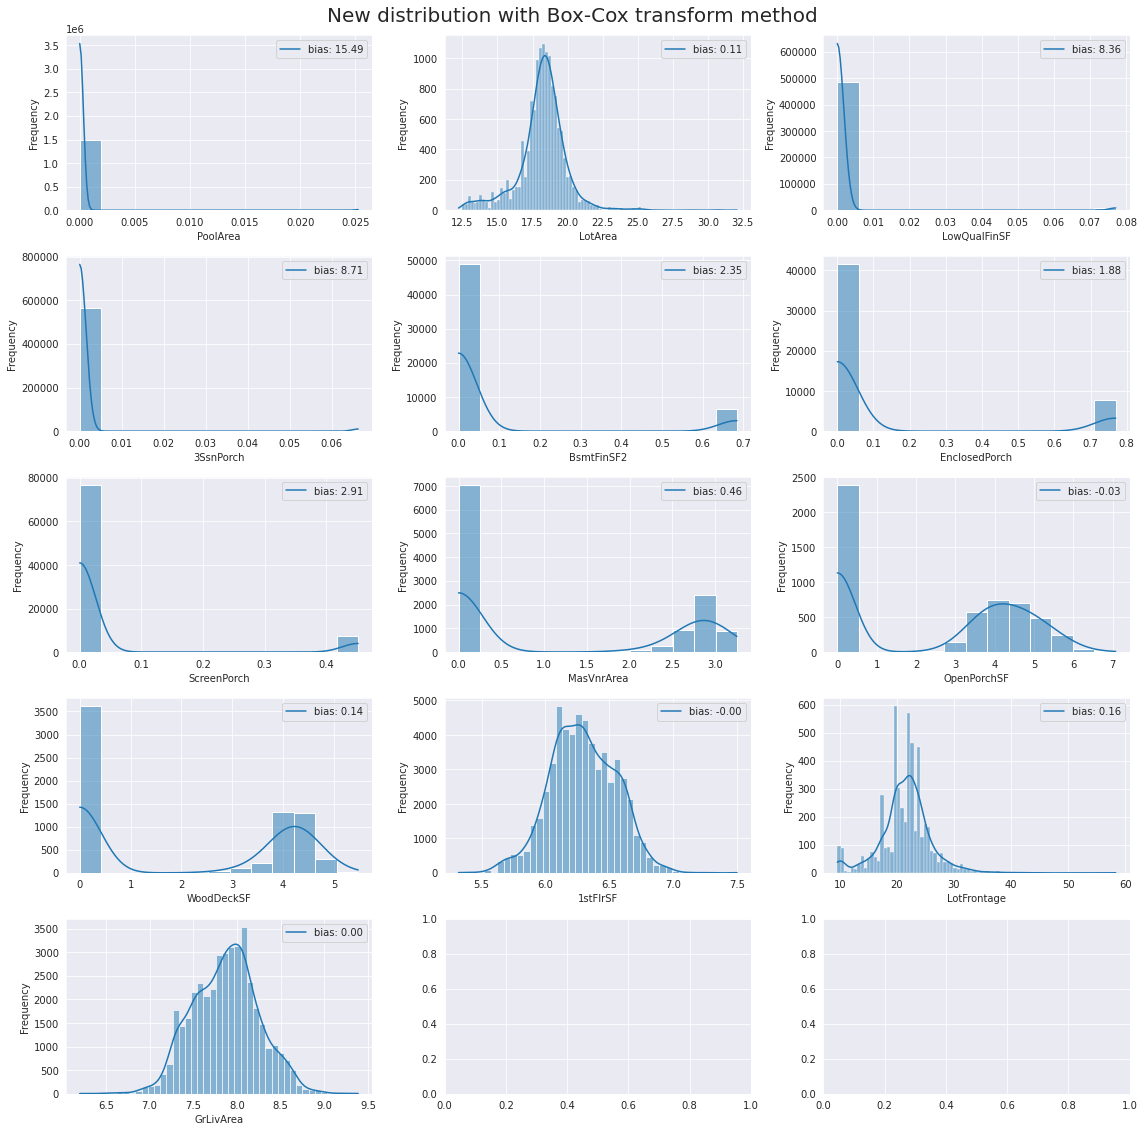

In [32]:
# Plot the new distribution 
n_cols = 3
n_rows = ceil(len(feats_bias)/n_cols)

fig, ax = plt.subplots(ncols = n_cols , nrows = n_rows, figsize=(16,16))
for i, col in enumerate(all_data_t[feats_bias]):    
    axes = ax[i//n_cols, i%n_cols]
    sns.histplot(all_data_t[col], stat = 'frequency',
                 hue_norm = norm, kde = True, ax = axes)
    axes.legend(['bias: {:.2f}'.format(skew(all_data_t[col]))], 
               loc = 'best')
    fig.suptitle(t = 'New distribution with Box-Cox transform method', 
                 fontsize = 20)
    plt.tight_layout()

### 1.3.7 DUMMY VARIABLES

An idea widely used is to create dummy variables from categorical features. This is very efficient because, the model of machine learning return the biggest precision with binary features (1 or 0). 

In [33]:
# Drop the old features that was transform in dummy variables
all_data_t = pd.get_dummies(all_data_t, prefix = None, prefix_sep = '_',
                            drop_first=True)

all_data_t.shape

(2917, 210)

Affter we work on the preprocessing data, to can divide again in Data Training and Data Testing for we will training the models. 

In [34]:
data_train = all_data_t[:n_train]
data_test = all_data_t[n_test - 1:]
print("Size of the data train is {}, and the data test: {}".format(data_train.shape, data_test.shape))

Size of the data train is (1458, 210), and the data test: (1459, 210)


# 2 MODELING

We have many models and algorithms that have objective predict a quantitive value, in this case, Sales Price of Houses as target feature. XGBoost, Gradient Boosting Regression and Random Forest Regression (Also the Traditional Desisión Forest) are options more than enough for modelling the behaviour of our data set.

In this case, we can evaluate some algorithms that allow us to do cross-validation between different models. We start with a Regression Tree with cross-validation after the random forest and finaly XGBoost that is the algorithms recommended for the competition.

In [35]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import joblib
import multiprocessing # For count, how many CPU processors have the machine

## 2.1 RANDOM FOREST REGRESSION

With a criterion of "Mean Squared Error", random sampling (oob_score = True) and with a number estimators of 10000 not necessary build cross validation. As this forest does its calculate of params form, the out values is ever for majority vote. 

In [36]:
# DataFrame for register predict DataTest submission
df_submission = pd.DataFrame()
df_submission['SalePrice'] = np.log1p(submission['SalePrice'])

# We divide in training and test for the cross-validation
X_train, X_test, y_train, y_test = train_test_split(data_train, y_target,
                                                    test_size = 0.3,
                                                    random_state = 2021)

In [37]:
# Model of Random Forest Regressor
forest = RandomForestRegressor(n_jobs = multiprocessing.cpu_count() - 1, 
                               oob_score= True, n_estimators = 2500,
                               criterion = 'mse', max_depth = 3, 
                               max_features = 'sqrt') # -> Mean Squared Error as Support Criteria
# Train Model
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', n_estimators=2500,
                      n_jobs=3, oob_score=True)

In [38]:
# Data Frame for we do a comparation between models. 
df_regression = pd.DataFrame()
df_regression['y_test'] = y_test
df_regression['rforest_pred'] = forest.predict(X_test)

df_regression.head()

df_regression['rforest_error2'] = (df_regression['rforest_pred'] - df_regression['y_test']) **2
rmse = np.sqrt(sum(df_regression['rforest_error2'])/len(data_train))
print("RMSE (test): {:.4f}".format(rmse))
print("The Coefficient of Determination is: {:.4f}".format(forest.oob_score_))

RMSE (test): 0.1139
The Coefficient of Determination is: 0.7089


In [39]:
# Save prediction on Data Testing in DataFrame
df_submission['random_forest'] = forest.predict(data_test)

# Mean Squared Error of Data Testing prediction.
rmse = np.sqrt(mean_squared_error(df_submission['SalePrice'], df_submission['random_forest']))
print("RMSE (Random Forest): {:.4f}".format(rmse))

RMSE (Random Forest): 0.2480


In [40]:
# The list of features importances for in Random Forest model.
forest_feats = pd.DataFrame(forest.feature_importances_, 
                            index = data_train.columns.tolist(),
                            columns = ['feature_importances'])

forest_feats.sort_values(by = 'feature_importances', ascending = False, inplace = True)

# The frist ten features importance in the model.
forest_feats.head(10)

,feature_importances
GrLivArea,0.083532
OverallQual,0.078119
ExterQual,0.067715
YearBuilt,0.065532
GarageCars,0.051604
GarageArea,0.049272
FullBath,0.048837
GarageYrBlt,0.046508
TotalBsmtSF,0.043383
1stFlrSF,0.039116


## 2.2 GRADIENT BOOSTING REGRESSION

The Gradient Boosting Regression is an algorithm that calculates of sequential form through a learning rate (Gradient Descend) for an optimal function cost. In this case, we cannot dispense with cross-validation but some Hyperparameters is critical for optimization it. The max depth of the tree, the number of estimators and the learning rate are principal parameters that we should estimate for the model adjustment.

### 2.2.1 N° OF TREE - CROSS VALIDATION

The first cross-validation that we do is with "n_estimators". With a range of the values, return the mean squared error and scores of Cross-Validation. After, we can plot graph for we do analysis and select a n_estimator optimal. 

In [41]:
###############################################################################
#                       N° OF TREE - CROOS VALIDATION

# Validaton with k-cross_validation and neg_root_mean_squared_error
# ============================================================================
train_scores = []
cv_scores = []

# Values at evalueate
estimator_range = range(1, 10000, 500)

# Loop for training model for each value of n_estimators, 
# after we extract its error of train and k-cross-validation.
for n_estimators in estimator_range:
    
    GBR_model = GradientBoostingRegressor(loss = 'ls',
                                          learning_rate     = 0.01,
                                          n_estimators      = n_estimators,
                                          criterion         ='mse',
                                          min_samples_split = 15,
                                          min_samples_leaf  = 10,
                                          max_depth         = 3,
                                          max_features      = 'sqrt',
                                          #--> Range in percentage wherefore we consider the model is not getting better.
                                          tol               = 0.0001,  
                                          random_state      = 2021
                                          )
    # Error of train
    GBR_model.fit(X_train, y_train) #--> Train
    GBR_pred = GBR_model.predict(X_test) #--> Pred Values
    GBR_rsme = mean_squared_error(y_true  = y_test, #--> Mean Squared Errot
                                  y_pred  = GBR_pred,
                                  squared = False)
    
    train_scores.append(GBR_rsme)
    
    # Error Cross Validation
    cv = KFold(n_splits = 10, shuffle=True, random_state = 2021)
    GBR_scores = cross_val_score(
                    estimator = GBR_model,
                    X         = X_train,
                    y         = y_train,
                    scoring   = 'neg_root_mean_squared_error',
                    cv        = cv,
                    n_jobs    = multiprocessing.cpu_count() - 1              
                    )
    
    # We add the scores of cross_val_score() and covert positive
    cv_scores.append(-1*GBR_scores.mean())

The N° Estimators optimal 3001, where is reached a CV Min Error of 0.1169


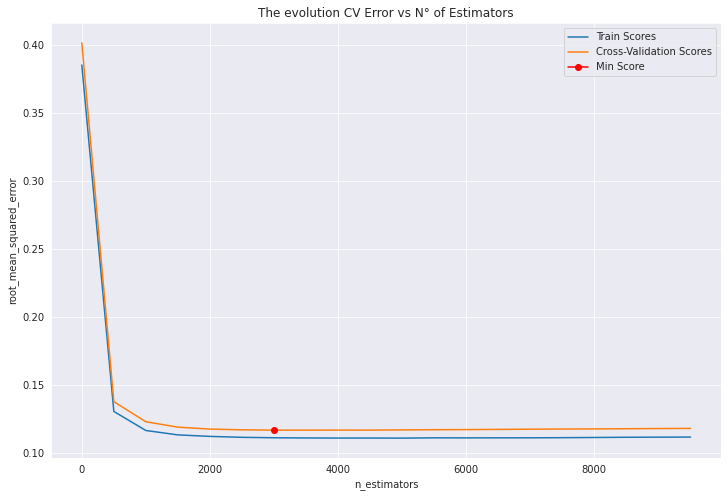

In [42]:
# Plot with the evolution of errors:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(estimator_range, train_scores, label = 'Train Scores')
ax.plot(estimator_range, cv_scores, label = "Cross-Validation Scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker = 'o', color = 'red', label = 'Min Score')
ax.set_xlabel("n_estimators")
ax.set_ylabel("root_mean_squared_error")
ax.set_title("The evolution CV Error vs N° of Estimators")
plt.legend()

print("The N° Estimators optimal {}, where is reached a CV Min Error of {:.4f}".format(estimator_range[np.argmin(cv_scores)], min(cv_scores)))

### 2.2.2 LEARNING RATE - CROSS VALIDATION

Now, we do cross validation of learning rate and n_estimators. This can will to get an idea of which learning rate is optimal for the model. 

In [43]:
##############################################################################
#                   LEARNING RATE  N° of TREE - CROSS VALIDATION

# Validaton with k-cross_validation and neg_root_mean_squared_error
# ============================================================================
results = {}

# Learning rate values and n_estimators
learning_rates = [0.001, 0.01, 0.1]
n_estimators = [1500, 2000, 2500, 3000, 4000, 5000, 8000, 9000]

# Loop for training a model for each combination of learning rate and n_estimatior
# in addition, we extract of Mean Squared Error and K-Cross-Validation

for lr in learning_rates:
    
    train_scores = []
    cv_scores = []
    
    for n_trees in n_estimators:
        
        # Set paramns model
        GBR_model = GradientBoostingRegressor(
                            loss                = 'ls',
                            learning_rate       = lr,
                            n_estimators        = n_trees,
                            criterion           = 'mse',
                            min_samples_split   = 15,
                            min_samples_leaf    = 10,
                            max_depth           = 3,
                            max_features        = 'sqrt',
                            #--> Range in percentage wherefore we consider the model is not getting better.
                            tol                 = 0.0001,
                            random_state        = 2021 
            )

        # Error of train
        GBR_model.fit(X_train, y_train)
        GBR_pred = GBR_model.predict(X_test)
        GBR_rmse = mean_squared_error(y_true   = y_test,
                                      y_pred   = GBR_pred,
                                      squared  = False
                                      )
        train_scores.append(GBR_rmse)
        
        # Error Cross - Validation
        cv = KFold(n_splits = 10, shuffle=True, random_state = 2021)
        GBR_scores = cross_val_score(
                                estimator       = GBR_model, 
                                X               = X_train, 
                                y               = y_train,
                                scoring         = 'neg_root_mean_squared_error',
                                cv              = cv,
                                n_jobs          = multiprocessing.cpu_count() - 1
                                ) 

        # We add the cross_val_score and convert positive.
        cv_scores.append(-1*GBR_scores.mean())
        
    results[lr] = {'train_scores': train_scores, 'cv_scores': cv_scores} 

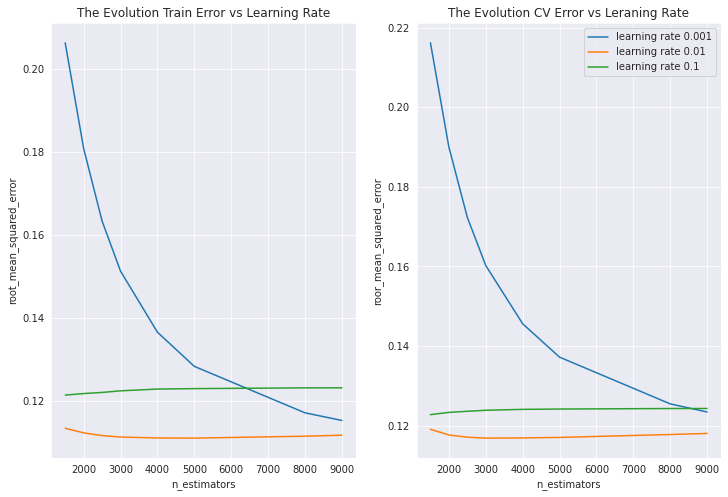

In [44]:
# Plot with evaluation of errors:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 8))

for key, value in results.items():
    axes[0].plot(n_estimators, value['train_scores'], label = "Learning rate {}".format(key))
    axes[0].set_xlabel("n_estimators")
    axes[0].set_ylabel("root_mean_squared_error")
    axes[0].set_title("The Evolution Train Error vs Learning Rate")
    
    axes[1].plot(n_estimators, value['cv_scores'], label = "learning rate {}".format(key))
    axes[1].set_xlabel("n_estimators")
    axes[1].set_ylabel("roor_mean_squared_error")
    axes[1].set_title("The Evolution CV Error vs Leraning Rate")
    plt.legend()

The learning rate that most reduce of MSE a major number of estimators is 0.001. However, this number of trees has computacional cost that is very high.   

### 2.2.3 MAX DEPTH - CROSS - VALIDATION

In [45]:
#############################################################################
#                   MAX DEPTH - CROSS - VALIDATION

# Validation with k-cross-validation and neg_root_mean_squared_error
# ===========================================================================

train_scores = []
cv_scores = []

# Values at Evaluate
max_depths = [3, 4, 5, 6, 7, 8, 9, 10, 20]

for depth in max_depths:
    
    GBR_model = GradientBoostingRegressor(
                        loss = 'ls',
                        learning_rate     = 0.11,
                        n_estimators      = 3000,
                        min_samples_split = 15,
                        min_samples_leaf  = 10,
                        max_depth         = depth,
                        max_features      = 'sqrt',
                        #--> Range in percentage wherefore we consider the model is not getting better.
                        tol             = 0.0001,
                        random_state      = 2021
        )

    # Error of Train
    GBR_model.fit(X_train, y_train)
    GBR_pred = GBR_model.predict(X_test)
    GBR_rmse = mean_squared_error(y_true  = y_test,
                                  y_pred  = GBR_pred,
                                  squared = False
                                  )
    train_scores.append(GBR_rmse)
    
    # Error Cross - Validation
    cv = KFold(n_splits = 10, shuffle = True, random_state = 2021)
    GBR_scores = cross_val_score(estimator = GBR_model,
                                 X         = X_train,
                                 y         = y_train,
                                 scoring   = 'neg_root_mean_squared_error',
                                 cv        = cv,
                                 n_jobs    = multiprocessing.cpu_count() - 1
                                 )
    
    # We add the cross_val_score and convert positive
    cv_scores.append(-1*GBR_scores.mean())

The optimal value for Max Depth is: 4


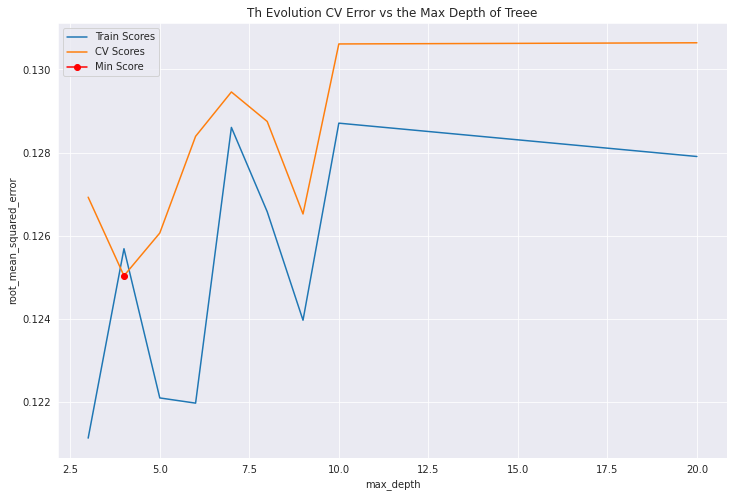

In [46]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(max_depths, train_scores, label = "Train Scores")
ax.plot(max_depths, cv_scores, label = "CV Scores")
ax.plot(max_depths[np.argmin(cv_scores)], min(cv_scores), label = "Min Score",
        marker = "o", color = 'red')
ax.set_xlabel("max_depth")
ax.set_ylabel("root_mean_squared_error")
ax.set_title("Th Evolution CV Error vs the Max Depth of Treee")
plt.legend()

print("The optimal value for Max Depth is: {}".format(max_depths[np.argmin(cv_scores)]))

### 2.2.4 GRID SEARCH - FIND OPTIMAL HYPERPARAMNS

The other form of search the best hyperparameters that are cotained in Gradiente Boosting Regressor Algorithm is pass a grid paramns for the search. The Grid Search will find the best combination that keeps equilibrium between the bias and variance.

In [47]:
"""
# Grid of Hyperparameters Evaluated
# ===========================================================================

# Load model of grid search for Gradient Boosting Regressor
grid = joblib.load("GBR_grid_search.sav")

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [2, 3, 4, 6],
              'subsample': [0.5, 1],
              'learning_rate': [0.001, 0.01, 0.1],
              'min_samples_split': [14, 16, 18],
              'min_samples_leaf': [6, 10, 12]
    }

# We pass of grid parameters. We keep the type scoring to add an KFold Sthocastic
# with RepeatedKFold from Scikit-Learn.

# Grid Search of hyperparameters
grid = GridSearchCV(
    estimator           = GradientBoostingRegressor(
                                loss                = 'ls',
                                n_estimators        = 3000,
                                random_state        = 2021,
                                # For Early
                                validation_fraction = 0.1,
                                tol                 = 0.0001
                                ),
    param_grid         = param_grid,
    scoring            = 'neg_root_mean_squared_error',
    n_jobs             = multiprocessing.cpu_count() -1,
    cv                 = RepeatedKFold(n_splits     = 10,
                                       n_repeats    = 1,
                                       random_state = 2021),
    refit              = True,
    verbose            = 0, 
    return_train_score = True
    )

# Fit Grid Search.
grid.fit(X_train, y_train)

GBR_model_gs = pd.DataFrame(grid.cv_results_)

GBR_model_gs.filter(regex = '(param.*|mean_t|std)') \
    .drop(columns = 'params') \
        .sort_values('mean_test_score', ascending = False) \
            .head(8)

# ==== SAVE GRID ====
filename = 'GBR_grid_search.sav'
joblib.dump(grid, filename)
# ===================

# ===========================================================================
# The best hyperparamns finded:
print("---------------------------------------------------------------------")
print("The best Hyperparamns finded (CV)")
print("---------------------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)
"""

'\n# Grid of Hyperparameters Evaluated\n# ===========================================================================\n\n# Load model of grid search for Gradient Boosting Regressor\ngrid = joblib.load("GBR_grid_search.sav")\n\nparam_grid = {\'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n              \'max_depth\': [2, 3, 4, 6],\n              \'subsample\': [0.5, 1],\n              \'learning_rate\': [0.001, 0.01, 0.1],\n              \'min_samples_split\': [14, 16, 18],\n              \'min_samples_leaf\': [6, 10, 12]\n    }\n\n# We pass of grid parameters. We keep the type scoring to add an KFold Sthocastic\n# with RepeatedKFold from Scikit-Learn.\n\n# Grid Search of hyperparameters\ngrid = GridSearchCV(\n    estimator           = GradientBoostingRegressor(\n                                loss                = \'ls\',\n                                n_estimators        = 3000,\n                                random_state        = 2021,\n                                # For E

**The best Hyperparameters find that was calculated in my local machine:**

* learning_rate: 0.01
* max_depth: 3
* max_features: 'sqrt'
* min_samples_leaf: 6
* min_samples_split: 14
* subsample: 0.5

**nrmse** = -0.11707

### 2.2.5 MODEL OPTIMAL FOR GRADIENT BOOSTING REGRESSOR

One time we find th hyperparametrs optimal, we built the definitive model with its.

In [48]:
# The model definitive
GBR_model_def = GradientBoostingRegressor(
                                loss              = 'ls',
                                learning_rate     = 0.001,
                                n_estimators      = 3000,
                                max_features      ='sqrt',
                                min_samples_split = 14,
                                min_samples_leaf  = 6,
                                max_depth         = 3,
                                subsample         = 0.5,
                                # For Early
                                validation_fraction = 0.1,
                                tol = 0.0001
                                )

GBR_model_def.fit(X_train, y_train)
GBR_pred = GBR_model_def.predict(X_test)
GBR_rmse = np.sqrt(mean_squared_error(y_true = y_test,
                                      y_pred = GBR_pred))

df_regression['GBR_pred'] = GBR_pred
df_regression['GBR_error2'] = (df_regression['GBR_pred'] - df_regression['y_test'])**2

print("RMSE (Test): {:.4}".format(GBR_rmse))
print("The Coefficient of Determination is: {:.4f}".format(GBR_model_def.score(X_test, y_test)))

RMSE (Test): 0.1506
The Coefficient of Determination is: 0.8487


In [49]:
# Save Prediction of Data Testing on DataFrame 
df_submission['GBR'] = GBR_model_def.predict(data_test)

# Mean Squared Error of Data Testing prediction.
rmse = np.sqrt(mean_squared_error(df_submission['SalePrice'], df_submission['GBR']))
print("RMSE: {:.4f}".format(rmse))

RMSE: 0.3081


## 2.3 LASSO - LINEAR REGRESSION WITH PENALTY

Linear Regression Ordinary have a disadvantage clearly, the model take allfeatures with the same importance and cannot penalty those features with littleinfluence as well the random forest model and gradient boosting regression do yet.

LASSO model is a Linear Regression with Lambda Factor that allows to penalty those features not offer importance in the model. 

In [50]:
##############################################################################
#                                LASSO MODEL

# Charge library for the scaler data and build pipeline
from sklearn.preprocessing import RobustScaler # <- escaler data
from sklearn.pipeline import make_pipeline # Through pipeline funtion

# we build model
LASSO_model = make_pipeline(RobustScaler(), Lasso(alpha = 0.05, random_state = 2021))

#training
LASSO_model.fit(X_train, y_train)

# Return predictions in X testing set
LASSO_pred = LASSO_model.predict(X_test)

# We get metrics
score = LASSO_model.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, LASSO_pred))
print("RMSE (Test): {:.4f}".format(rmse))
print("The Coefficient of Determination of prediction is {:.4f}".format(score))

# Save prediction of X_test in DataFrame Regression
df_regression['LASSO_pred'] = LASSO_pred
df_regression['LASSO_error2'] = (df_regression['LASSO_pred'] - df_regression['y_test']) **2

RMSE (Test): 0.1852
The Coefficient of Determination of prediction is 0.7711


In [51]:
# Save prediction of Data Testing in DataFrame Submission
df_submission['LASSO'] = LASSO_model.predict(data_test) 

rmse = np.sqrt(mean_squared_error(df_submission['SalePrice'], df_submission['LASSO']))
print("RMSE (Lasso): {:.4f}".format(rmse))

RMSE (Lasso): 0.2672


## 2.4 XGBOOST REGRESSOR

With the library XGboost and Regressor module, we can build a model to predict SalePrice value. We avoid overfitting through cross-validation. For lucky, XGboost has a module Regressor with cross-validation into it. 

In [52]:
##############################################################################
#                       XGBoost - Cross Validation

"""
    This module requires these data to be transformed into the matrix. 
XGBoost has function for this.
"""

data_dmatrix = xgb.DMatrix(data = data_train, label = y_target)
dmatrix_test = xgb.DMatrix(data = data_test)

# Hyperparameters
params = {'objective': 'reg:squarederror', 'colsample_bytree': 0.3,
          'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 4, 'alpha': 10}


# Cross-Validation:
cv_results = xgb.cv(dtrain = data_dmatrix, params = params, nfold = 10,
                    num_boost_round = 3000, early_stopping_rounds= 10,
                    metrics = 'rmse', as_pandas = True, seed = 2021)

cv_results.tail(1)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
2999,0.142355,0.001038,0.159152,0.011451


In [53]:
XGBoost_model = xgb.train(params = params, dtrain = data_dmatrix, num_boost_round = 3000)
XGBoost_pred = XGBoost_model.predict(dmatrix_test)

df_submission['XGBoost'] = XGBoost_pred

rmse = np.sqrt(mean_squared_error(df_submission['SalePrice'], XGBoost_pred))
print("RMSE (XGBoost - CV): {:.4f}".format(rmse))

RMSE (XGBoost - CV): 0.3446


## 2.5 SELECT THE BEST MODEL

We select the best model which it has the more little the root mean squared error

In [54]:
# Our candidate submission data frame:
df_submission.head()

,SalePrice,random_forest,GBR,LASSO,XGBoost
0,12.039298,11.803401,11.771430,11.799655,11.713283
1,12.142917,11.902595,11.934987,12.148436,11.889348
2,12.120431,12.114262,12.127350,12.081746,12.172684
3,12.096919,12.148671,12.160793,12.115741,12.174109
4,11.923253,12.165603,12.142118,12.082879,12.144760


In [55]:
# Dict of RMSE Models
models = df_submission.columns.tolist()
models.remove('SalePrice')

rmse_list = dict()
for model in models:
    rmse = np.sqrt(mean_squared_error(df_submission['SalePrice'], df_submission[model]))
    rmse_list[model] = rmse
    print(model)

print(rmse_list)

random_forest
GBR
LASSO
XGBoost
{'random_forest': 0.2479649397688846, 'GBR': 0.30812897577898074, 'LASSO': 0.26722569107462035, 'XGBoost': 0.34464115551003394}


* **Submission**

In [56]:
os.chdir("/kaggle/working")

In [57]:
submission = pd.DataFrame()
submission['Id'] = id_test
submission['SalePrice'] = np.expm1(df_submission['random_forest'])
#submission.to_csv('submission.csv', index = False)
submission.to_csv('submission.csv', index = False)

**If you like this notebook, I would love you put liked it !. This would help me at I will continue motivated! :).  I will try to do new updates in the next future, this notebook is very far of be finished.**